<a href="https://colab.research.google.com/github/Akrom1996/LSTM/blob/main/LSTM_ENERGY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting  from google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READ CSV FILE FROM GOOGLE DRIVE
drive_path = "/content/drive/MyDrive/photoVoltaic LSTM/dataset.csv"
df = pd.read_csv(drive_path, parse_dates=['Timestamp'],
  index_col="Timestamp")
print(df.head())
print(df.shape)
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

                    site1 site2 site3 site4  ... site47 site48 site49 site50
Timestamp                                    ...                            
2020-01-01 00:13:44     -   NaN     -     -  ...      -      -      -      -
2020-01-01 00:29:03     -   NaN     -     -  ...      -      -      -      -
2020-01-01 00:44:22     -   NaN     -     -  ...      -      -      -      -
2020-01-01 00:59:41     -   NaN     -     -  ...      -      -      -      -
2020-01-01 01:13:43     -   NaN     -     -  ...      -      -      -      -

[5 rows x 50 columns]
(24065, 50)


In [3]:
# FILLING EXISTING DATA WITH 0
df = df.replace('-', np.nan)
new_data = df.fillna(0)
print(new_data.head())

                    site1 site2 site3  ... day_of_month day_of_week month
Timestamp                              ...                               
2020-01-01 00:13:44     0     0     0  ...          1.0         2.0   1.0
2020-01-01 00:29:03     0     0     0  ...          1.0         2.0   1.0
2020-01-01 00:44:22     0     0     0  ...          1.0         2.0   1.0
2020-01-01 00:59:41     0     0     0  ...          1.0         2.0   1.0
2020-01-01 01:13:43     0     0     0  ...          1.0         2.0   1.0

[5 rows x 54 columns]


In [4]:
# CHANGING COLUMN NAMES
new_data['site1']=new_data['site1'].astype(str).astype(float)
new_data['site2']=new_data['site2'].astype(str).astype(float)
new_data['site3']=new_data['site3'].astype(str).astype(float)
new_data['site4']=new_data['site4'].astype(str).astype(float)
new_data['site5']=new_data['site5'].astype(str).astype(float)
new_data['site6']=new_data['site6'].astype(str).astype(float)
new_data['site7']=new_data['site7'].astype(str).astype(float)
new_data['site8']=new_data['site8'].astype(str).astype(float)
new_data['site9']=new_data['site9'].astype(str).astype(float)
new_data['site10']=new_data['site10'].astype(str).astype(float)
new_data['site11']=new_data['site11'].astype(str).astype(float)
new_data['site12']=new_data['site12'].astype(str).astype(float)
new_data['site13']=new_data['site13'].astype(str).astype(float)
new_data['site14']=new_data['site14'].astype(str).astype(float)
new_data['site15']=new_data['site15'].astype(str).astype(float)
new_data['site16']=new_data['site16'].astype(str).astype(float)
new_data['site17']=new_data['site17'].astype(str).astype(float)
new_data['site18']=new_data['site18'].astype(str).astype(float)
new_data['site19']=new_data['site19'].astype(str).astype(float)
new_data['site20']=new_data['site20'].astype(str).astype(float)
new_data['site21']=new_data['site21'].astype(str).astype(float)
new_data['site22']=new_data['site22'].astype(str).astype(float)
new_data['site23']=new_data['site23'].astype(str).astype(float)
new_data['site24']=new_data['site24'].astype(str).astype(float)
new_data['site25']=new_data['site25'].astype(str).astype(float)
new_data['site26']=new_data['site26'].astype(str).astype(float)
new_data['site27']=new_data['site27'].astype(str).astype(float)
new_data['site28']=new_data['site28'].astype(str).astype(float)
new_data['site29']=new_data['site29'].astype(str).astype(float)
new_data['site30']=new_data['site30'].astype(str).astype(float)
new_data['site31']=new_data['site31'].astype(str).astype(float)
new_data['site32']=new_data['site32'].astype(str).astype(float)
new_data['site33']=new_data['site33'].astype(str).astype(float)
new_data['site34']=new_data['site34'].astype(str).astype(float)
new_data['site35']=new_data['site35'].astype(str).astype(float)
new_data['site36']=new_data['site36'].astype(str).astype(float)
new_data['site37']=new_data['site37'].astype(str).astype(float)
new_data['site38']=new_data['site38'].astype(str).astype(float)
new_data['site39']=new_data['site39'].astype(str).astype(float)
new_data['site40']=new_data['site40'].astype(str).astype(float)
new_data['site41']=new_data['site41'].astype(str).astype(float)
new_data['site42']=new_data['site42'].astype(str).astype(float)
new_data['site43']=new_data['site43'].astype(str).astype(float)
new_data['site44']=new_data['site44'].astype(str).astype(float)
new_data['site45']=new_data['site45'].astype(str).astype(float)
new_data['site46']=new_data['site46'].astype(str).astype(float)
new_data['site47']=new_data['site47'].astype(str).astype(float)
new_data['site48']=new_data['site48'].astype(str).astype(float)
new_data['site49']=new_data['site49'].astype(str).astype(float)
new_data['site50']=new_data['site50'].astype(str).astype(float)

In [183]:
column_length = 10 #start it from 3 to 12 do not choose 8
column_index = column_length+2
# SEPERATE DATA FROM 1-3 MONTHS
data = new_data.iloc[:5680,2:column_index]

# DEFINING TRAIN AND TEST SIZES
train_size = int(len(data) * 0.9)
train_data = data.iloc[:train_size,:]
test_data  = data.iloc[train_size:,:]

X_train, y_train = train_data.iloc[:,:column_length-1],train_data.iloc[:,column_length-1]
X_test, y_test = test_data.iloc[:,:column_length-1],test_data.iloc[:,column_length-1]

# USE MINMAX SCALER
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#SCALING TRAIN DATA
scaled_X_train = scaler.fit_transform(X_train)
scaled_y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

scaled_X_train = scaled_X_train.reshape(len(scaled_X_train),1, column_length-1)
scaled_y_train = scaled_y_train.reshape(-1,1)

#SCALING TEST DATA
scaled_X_test = scaler.fit_transform(X_test)
scaled_y_test = scaler.fit_transform(y_test.values.reshape(-1,1))

scaled_X_test = scaled_X_test.reshape(len(scaled_X_test),1, column_length-1)
scaled_y_test = scaled_y_test.reshape(-1,1)


for i in range(30,60):
	print('%s => %s' % (scaled_X_train[i], scaled_y_train[i]))
  
print(X_train.shape, y_train.shape)

[[0.07598221 0.07204515 0.07031756 0.07091737 0.08713137 0.08146706
  0.06993232 0.         0.07923052]] => [0.07495622]
[[0.09266123 0.07038513 0.08781594 0.06864021 0.13907507 0.13567024
  0.08088946 0.         0.13172481]] => [0.10367776]
[[0.13973314 0.06938911 0.117628   0.19030579 0.20911528 0.20253165
  0.08959072 0.         0.20182589]] => [0.17443082]
[[0.15715345 0.28718459 0.20998056 0.25959662 0.28418231 0.27198961
  0.09958105 0.         0.2683404 ]] => [0.24553415]
[[0.2005189  0.36088977 0.30719378 0.3308393  0.35187668 0.34209672
  0.18175959 0.         0.33518096]] => [0.23817863]
[[0.31912528 0.42430279 0.37167855 0.40696161 0.41621984 0.40830899
  0.24331292 0.         0.39647864]] => [0.29912434]
[[0.39065975 0.48605578 0.42093325 0.45966168 0.47788204 0.47711782
  0.29133097 0.         0.45549397]] => [0.3849387]
[[0.46590067 0.53851262 0.47666883 0.51594014 0.53418231 0.53683869
  0.45697712 0.         0.50701011]] => [0.52084063]
[[0.53595256 0.58598938 0.5158781

In [184]:
# MODEL CREATION
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import preprocessing
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

model = keras.Sequential()
# model.add(LSTM(128,
#                return_sequences=True,
#                input_shape=(scaled_X_train.shape[1], scaled_X_train.shape[2]))
# )
model.add(
    keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(scaled_X_train.shape[1], scaled_X_train.shape[2])
    )
  )
)
# model.add(LSTM(128,return_sequences=True))
# model.add(LSTM(128,return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [185]:
from pathlib import Path
my_path = '/content/drive/MyDrive/Colab Notebooks/'+'model_'+str(column_length)
my_model = Path(my_path)
if my_model.exists():
  model = tf.keras.models.load_model(my_path)
  print('model has been loaded')
else:
  # MODEL FITTING
  history = model.fit(
      scaled_X_train, scaled_y_train,
      epochs = 100,
      batch_size=256,
      validation_split=0.01,
      shuffle = False
  )
  model.save(my_path)
  print('model has been saved')

model has been loaded


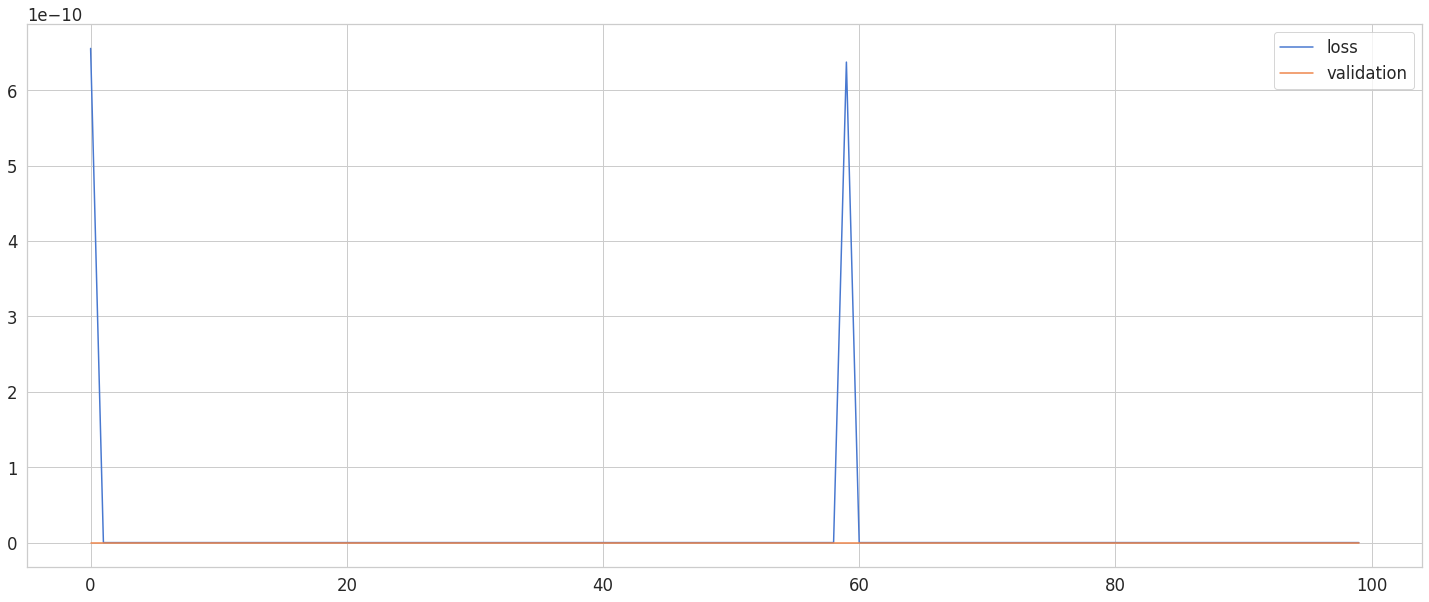

In [186]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#DRAWING LOSS AND VALIDATION
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

[[   0.     ]
 [   0.     ]
 [   0.     ]
 [   0.     ]
 [   0.     ]
 [   0.     ]
 [ 241.72148]
 [ 238.34433]
 [ 255.31337]
 [ 386.53894]
 [ 654.8832 ]
 [ 793.4139 ]
 [ 975.77014]
 [ 631.50037]
 [1281.9008 ]
 [1717.8256 ]
 [1901.2933 ]
 [1844.5404 ]
 [2262.0105 ]
 [2421.271  ]]
Timestamp
2020-03-04 05:44:51       0.0
2020-03-04 05:58:54       0.0
2020-03-04 06:14:13       0.0
2020-03-04 06:29:32       0.0
2020-03-04 06:44:51       0.0
2020-03-04 06:59:46       0.0
2020-03-04 07:14:49     215.0
2020-03-04 07:29:52     217.0
2020-03-04 07:44:54     249.0
2020-03-04 07:59:57     344.0
2020-03-04 08:14:59     574.0
2020-03-04 08:28:58     574.0
2020-03-04 08:44:00     889.0
2020-03-04 08:59:03     508.0
2020-03-04 09:14:05    1125.0
2020-03-04 09:29:08    1670.0
2020-03-04 09:44:11    1896.0
2020-03-04 09:59:13    1730.0
2020-03-04 10:14:16    2075.0
2020-03-04 10:29:18    2234.0
Name: site12, dtype: float64


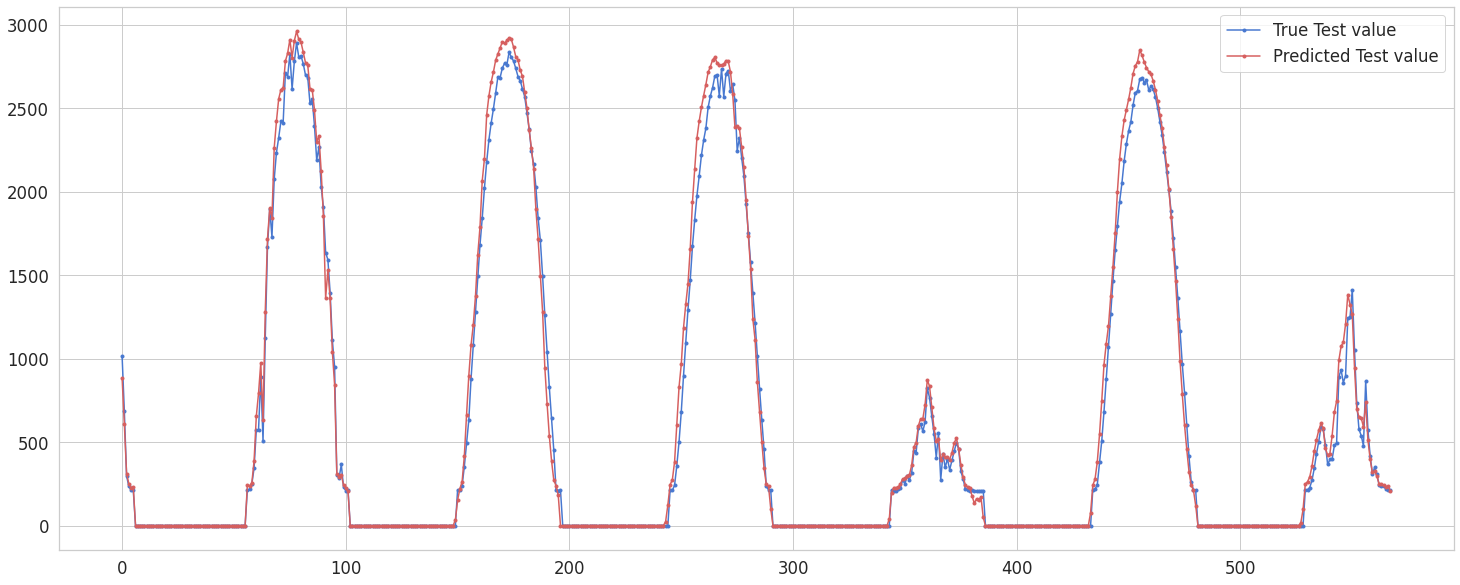

In [187]:
#PREDICTION STARTED WITH TEST DATA
y_pred_test = model.predict(scaled_X_test)
#predicted TEST value inverted
y_pred_test_inv = scaler.inverse_transform(y_pred_test)
#real TEST value inverted
scaled_y_test_inv = scaler.inverse_transform(scaled_y_test)

print(y_pred_test_inv[50:70])
print(y_test[50:70])
#DRAWING THE TRUE AND PREDICTED VALUES
import matplotlib.pyplot as plt
plt.plot(scaled_y_test_inv.flatten(), marker='.', label='True Test value')
plt.plot(y_pred_test_inv.flatten(), 'r', marker='.', label='Predicted Test value')
plt.legend()

In [104]:
# COMPILE THIS ONCE WHEN COLUMN_LENGTH IS 3
x, y = [], []

In [188]:
from sklearn.metrics import mean_squared_error
import math
# print(scaled_y_test_inv)
# print( y_pred_test_inv)
testScore = math.sqrt(mean_squared_error(scaled_y_test_inv, y_pred_test_inv))
print('Test Score: %.2f RMSE' % (testScore))
# d = {str(column_length)+' columns': [testScore]}
# dataframe = pd.DataFrame(d)
x.append(str(column_length)+' columns')
y.append(testScore)

Test Score: 93.85 RMSE


['3 columns', '4 columns', '5 columns', '6 columns', '7 columns', '9 columns', '10 columns'] [229.94778169746087, 132.87921793696327, 102.34436679718324, 113.83825303838297, 124.29346943718348, 104.61415383606514, 93.85139694661666]
                     0
3 columns   229.947782
4 columns   132.879218
5 columns   102.344367
6 columns   113.838253
7 columns   124.293469
9 columns   104.614154
10 columns   93.851397


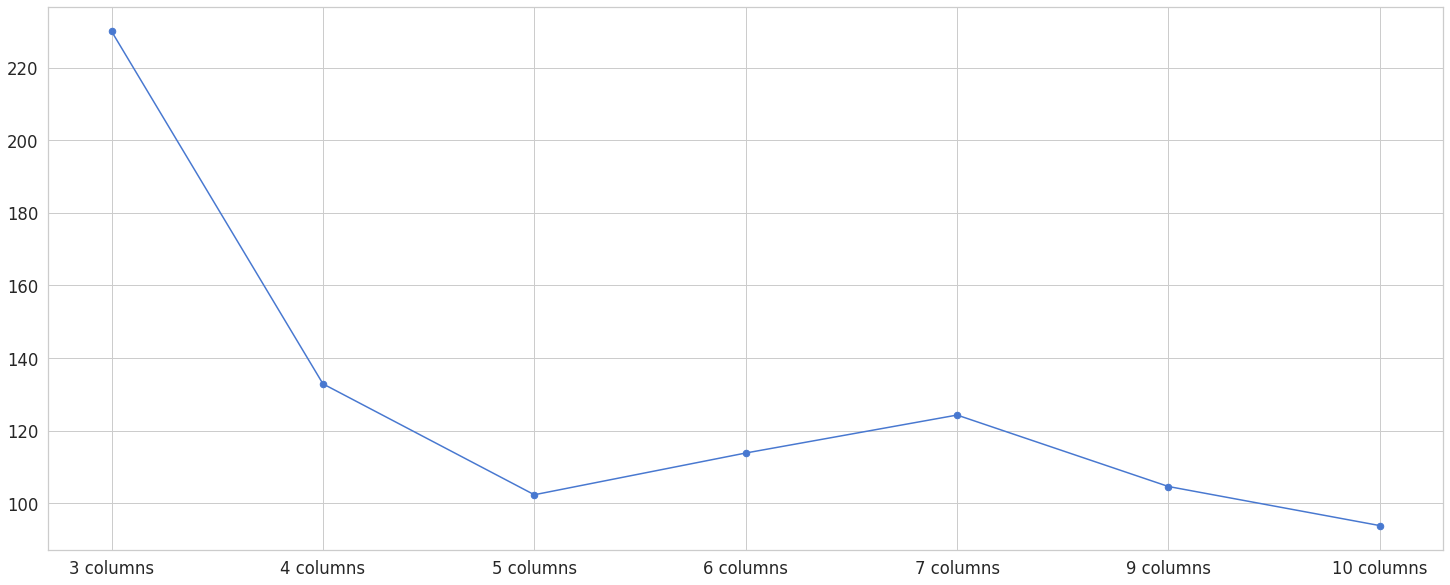

In [193]:
print(x, y)
dataframe = pd.DataFrame(y, index=x)
print(dataframe)
plt.plot(x,y,marker='.',markersize=13)

In [195]:
# CREATE NEW TEST DATA
test_ = new_data.iloc[6000:7000,2:column_index]

X_test_, y_test_ = test_.iloc[:,:column_length-1],test_.iloc[:,column_length-1]

scaled_test_ = scaler.fit_transform(X_test_)
scaled_test_ = scaled_test_.reshape(len(test_),1,column_length-1)

scaled_y = scaler.fit(y_test_.values.reshape(-1,1))
y_predicted = model.predict(scaled_test_)

inversed_y = scaler.inverse_transform(y_predicted.reshape(-1,1))
print(y_test_.values[-50:])
print(inversed_y[-50:])

[ 224.  226.  224.  231.  241.  312.  434.  581.  681.  942. 1078. 1267.
 1419. 1560. 1689. 1886. 2031. 1733. 2288. 2308. 2343. 2389. 2479. 2503.
 2441. 2542. 2629. 1476. 2229. 2596. 2597. 2560. 2421. 2427. 2362. 2308.
 2096. 2120. 1929. 1777. 1514. 1702. 1422.  660. 1590. 1101.  765.  567.
  645.  402.]
[[ 254.51837]
 [ 256.77982]
 [ 265.1934 ]
 [ 305.70984]
 [ 370.5515 ]
 [ 539.0177 ]
 [ 676.5644 ]
 [ 896.1274 ]
 [1102.8236 ]
 [1345.5613 ]
 [1533.116  ]
 [1739.5748 ]
 [1894.6456 ]
 [2059.0188 ]
 [2201.3647 ]
 [2277.663  ]
 [2437.4917 ]
 [2359.2441 ]
 [2718.76   ]
 [2761.902  ]
 [2839.3455 ]
 [2862.5476 ]
 [2854.605  ]
 [2819.1294 ]
 [2998.0845 ]
 [2562.134  ]
 [2453.4739 ]
 [2416.8245 ]
 [2949.4668 ]
 [2934.867  ]
 [2924.2598 ]
 [2833.2607 ]
 [2712.5347 ]
 [2640.759  ]
 [2534.999  ]
 [2450.4731 ]
 [2302.0657 ]
 [2150.5173 ]
 [1941.3142 ]
 [1877.7113 ]
 [1674.3242 ]
 [1356.1658 ]
 [1341.7582 ]
 [1129.0345 ]
 [1186.1671 ]
 [ 776.43567]
 [ 623.9915 ]
 [ 417.70905]
 [ 361.0069 ]
 [ 242.9

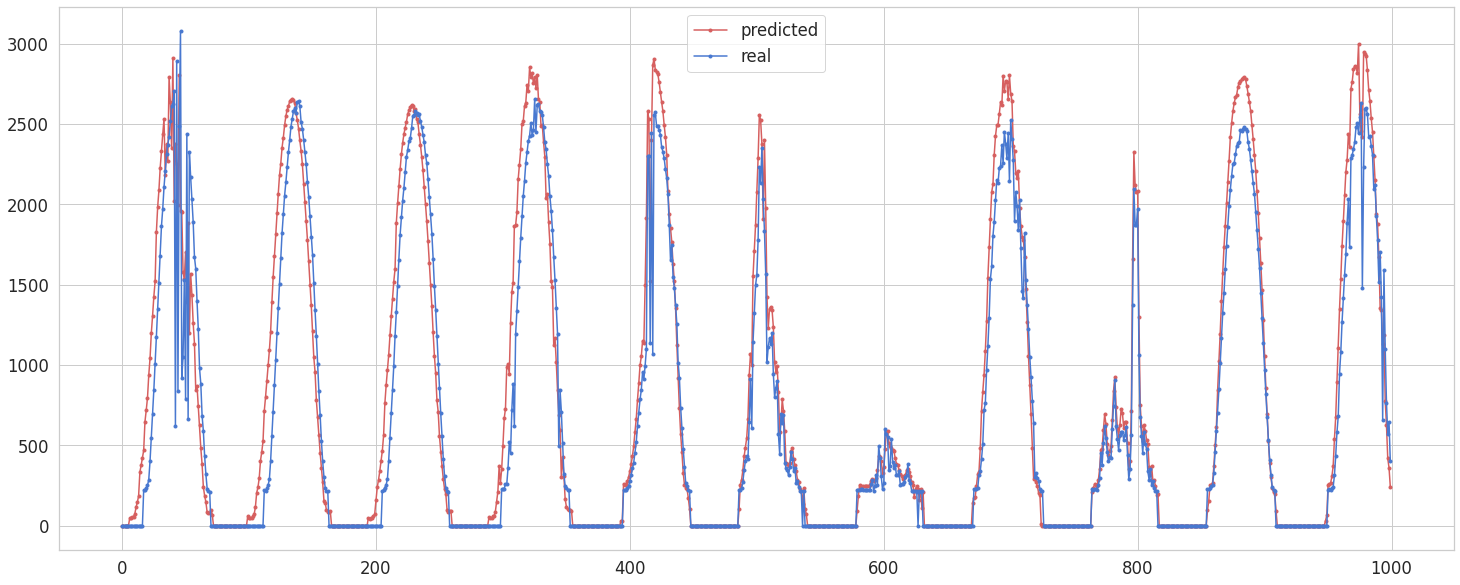

In [196]:
#DRAWING NEW TEST DATA RESULTS
plt.plot(inversed_y.flatten(),'r', marker='.', label='predicted')
plt.plot(y_test_.values,'b', marker='.', label='real')
plt.legend()